# An Analysis of Height Changes of NBA Players Over Time
## By: Cana Curtis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

nba = pd.read_csv(r'C:\Users\bonit\Downloads\archive\all_seasons.csv')
nba.head(10)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
5,5,Eddie Johnson,HOU,38.0,200.66,97.522280,Illinois,USA,1981,2,...,8.2,2.7,1.0,4.1,0.034,0.126,0.220,0.541,0.102,1996-97
6,6,Eddie Jones,LAL,25.0,198.12,86.182480,Temple,USA,1994,1,...,17.2,4.1,3.4,4.1,0.035,0.091,0.209,0.559,0.149,1996-97
7,7,Elden Campbell,LAL,28.0,213.36,113.398000,Clemson,USA,1990,1,...,14.9,8.0,1.6,3.3,0.095,0.183,0.222,0.520,0.087,1996-97
8,8,Eldridge Recasner,ATL,29.0,193.04,86.182480,Washington,USA,1992,Undrafted,...,5.7,1.6,1.3,-0.3,0.036,0.076,0.172,0.539,0.141,1996-97
9,9,Elliot Perry,MIL,28.0,182.88,72.574720,Memphis,USA,1991,2,...,6.9,1.5,3.0,-1.2,0.018,0.081,0.177,0.557,0.262,1996-97


### Data Cleansing

In [2]:
print(nba.info())
print(nba.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            12305 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

This dataset has personal and game-related stats of NBA players. It appears that there are no null or missing values in the data. There are a few descriptive statistics that stand out:
    <li> The average age in this study is 27. </li>
    <li> Heights in this study range from 160 cm to 231 cm. </li>
    <li> There are players in this study who have only played one game. </li>
    <li> There are playes in this study who have zero game stats. </li>    

In [3]:
nba.dtypes

Unnamed: 0             int64
player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

In [4]:
nba.shape

(12305, 22)

In [5]:
nba["season"].value_counts().sort_index(ascending = False)

2021-22    605
2020-21    540
2019-20    529
2018-19    530
2017-18    540
2016-17    486
2015-16    476
2014-15    492
2013-14    482
2012-13    469
2011-12    478
2010-11    452
2009-10    442
2008-09    445
2007-08    451
2006-07    458
2005-06    458
2004-05    464
2003-04    442
2002-03    428
2001-02    440
2000-01    441
1999-00    438
1998-99    439
1997-98    439
1996-97    441
Name: season, dtype: int64

There are at least 439 players in each season for the 26 NBA seasons in this dataset. 

In [6]:
nba["team_abbreviation"].value_counts()

CLE    433
TOR    428
MIA    426
LAC    424
DAL    422
WAS    422
ATL    421
PHI    420
HOU    418
SAS    413
DEN    412
ORL    411
LAL    411
NYK    410
IND    410
MIL    409
GSW    409
POR    407
BOS    407
CHI    406
DET    400
MIN    399
PHX    399
SAC    398
UTA    397
MEM    352
CHA    288
NJN    257
OKC    239
SEA    182
BKN    180
NOP    159
NOH    143
CHH     89
VAN     72
NOK     32
Name: team_abbreviation, dtype: int64

Currently, there are 30 teams in the NBA. This dataset includes 36 teams, meaning players from teams that are no longer active are included in the dataset. 

In [7]:
def compute_decade(nba):    
    if (nba['season'] >= '1996-97') & (nba['season'] <= '1999-00'):
        return '90s'
    elif (nba['season'] >= '2000-01') & (nba['season'] <= '2009-10'):
        return '00s'
    elif (nba['season'] >= '2010-11') & (nba['season'] <= '2019-20'):
        return '10s'
    elif (nba['season'] >= '2020-21') & (nba['season'] <= '2021-22'):
        return '20s'
    
nba['decade'] = nba.apply(compute_decade, axis = 1)
nba["decade"].value_counts()

10s    4934
00s    4469
90s    1757
20s    1145
Name: decade, dtype: int64

### Players Over Time


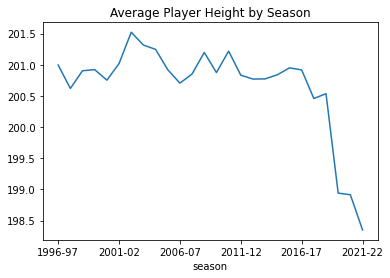

In [8]:
avgheightbyseason = nba.groupby("season")["player_height"].mean().sort_index(ascending = True)
avgheightbyseason.plot(kind='line')
plt.title('Average Player Height by Season')
plt.show()

[Text(0.5, 1.0, 'Player Heights by Decade')]

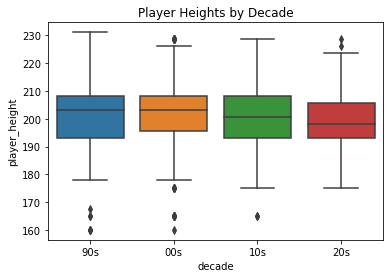

In [9]:
sns.boxplot(x = nba['decade'],
            y = nba['player_height']).set(title='Player Heights by Decade')

In [10]:
avgheightbydecade = nba.groupby("decade")["player_height"]

avgheightbydecade.describe()

,count,mean,std,min,25%,50%,75%,max
decade,,,,,,,,
00s,4469.0,201.037467,9.414456,160.02,195.58,203.20,208.28,228.60
10s,4934.0,200.600422,8.815265,165.10,193.04,200.66,208.28,228.60
20s,1145.0,198.616908,8.459692,175.26,193.04,198.12,205.74,228.60
90s,1757.0,200.859693,9.622744,160.02,193.04,203.20,208.28,231.14


The height of NBA players appear to decrease over time. The line graph shows average height decreasing steadily each year, with a few increases followed by more decreasing averages. 

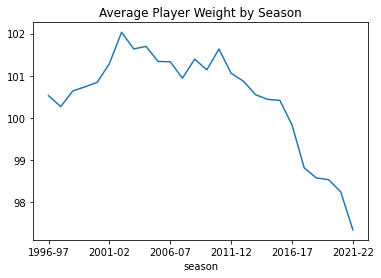

In [11]:
avgweightbyseason = nba.groupby("season")["player_weight"].mean().sort_index(ascending = True)
avgweightbyseason.plot(kind='line')
plt.title('Average Player Weight by Season')
plt.show()

[Text(0.5, 1.0, 'Player Weights by Decade')]

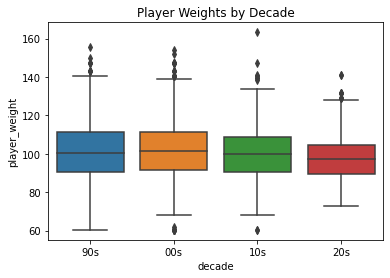

In [12]:
sns.boxplot(x = nba['decade'],
            y = nba['player_weight']).set(title='Player Weights by Decade')

In [13]:
avgheightbydecade = nba.groupby("decade")["player_height"]

avgheightbydecade.describe()

,count,mean,std,min,25%,50%,75%,max
decade,,,,,,,,
00s,4469.0,201.037467,9.414456,160.02,195.58,203.20,208.28,228.60
10s,4934.0,200.600422,8.815265,165.10,193.04,200.66,208.28,228.60
20s,1145.0,198.616908,8.459692,175.26,193.04,198.12,205.74,228.60
90s,1757.0,200.859693,9.622744,160.02,193.04,203.20,208.28,231.14


### Game Stats(Points)

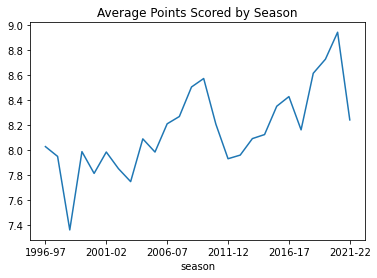

In [14]:
avgptsbyseason = nba.groupby("season")["pts"].mean().sort_index(ascending = True)
avgptsbyseason.plot(kind='line')
plt.title('Average Points Scored by Season')
plt.show()

### Game Stats (Rebounds)

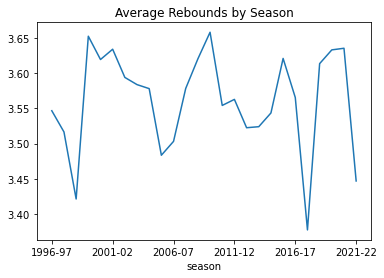

In [15]:
avgrebbyseason = nba.groupby("season")["reb"].mean().sort_index(ascending = True)
avgrebbyseason.plot(kind='line')
plt.title('Average Rebounds by Season')
plt.show()

### Game Stats(Assists)

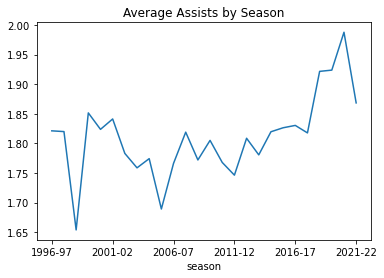

In [16]:
avgastbyseason = nba.groupby("season")["ast"].mean().sort_index(ascending = True)
avgastbyseason.plot(kind='line')
plt.title('Average Assists by Season')
plt.show()

### Height Correlation

In [22]:
correlated_nba = nba.corr(method='pearson')
plt.figure(figsize=(15, 15),dpi=600)
sns.heatmap(correlated_nba, annot=True, center=0, linewidths=.5, vmin=-1,vmax=1);
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Correlation Matrix')

Player height is closest correlated with assists with an r value of -0.6, meaning the shorter a player is, the higher number of  assists they get. Assists is also closesly correlated with player weight in the same way, meaning the less a player weighs, the more assists the get. 

### Linear Regression

In [ ]:
dependent_variable = nba['reb']
independent_variable = nba[['player_height', 'player_weight']]

regression_modelraw = sm.OLS(dependent_variable, independent_variable).fit()
print(regression_modelraw.summary())

In [ ]:
dependent_variable = nba['pts']
independent_variable = nba[['player_height', 'player_weight']]

regression_modelraw = sm.OLS(dependent_variable, independent_variable).fit()
print(regression_modelraw.summary())

## Insights


<li> Although the number of players in the NBA has increased steadily each year, the height of players have declined since the '90's and decreased dramatically in the '20's. </li>
<li> Player weights increased until the 00's, then has declined since then. </li>
<li> Average points scored and assists have increased each year since the '90's, but rebounds haven't chnaged much. </li>
<li> Player height and player weight both have a strong, negative relationship with assists.  </li>
<li> A linear regression model with player weight and height as independant vaiables account for 72.9% of variability in player rebounds. </li>